# MGC Demo
In this notebook, we show how to use the MGC independence test class on simulated data.

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
import matplotlib.ticker as ticker
import seaborn as sns; sns.set()
import pandas as pd
from mgcpy.independence_tests.mgc.mgc import MGC
from mgcpy.benchmarks import simulations as sims

**Function to compute and print MGC output values, given X and Y:**

In [55]:
def mgc(X, Y):
    mgc = MGC()
    mgc_statistic, independence_test_metadata = mgc.test_statistic(X, Y)
    p_value, metadata = mgc.p_value(X, Y)

    print("MGC test statistic:", mgc_statistic)
    print("P Value:", p_value)
    print("Optimal Scale:", independence_test_metadata["optimal_scale"])
    return mgc_statistic, p_value, independence_test_metadata

**Function to compute and plot the simulated data and the MGC corresponding local correlation maps with optimal scale:**

In [66]:
def mgc_plot(X, Y, simulation_name, only_viz=False, only_mgc=False):
    plt.clf()

    if not only_mgc:
        # simulation
        fig = plt.figure(figsize=(8,8))
        fig.suptitle(simulation_name + " Simulation", fontsize=17)
        ax = sns.scatterplot(x=X[:,0], y=Y[:,0])
        ax.set_xlabel('X', fontsize=15)
        ax.set_ylabel('Y', fontsize=15) 
        plt.axis('equal')
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.show()

    if not only_viz:
        mgc_statistic, p_value, independence_test_metadata = mgc(X, Y)
        # local correlation map
        local_corr = independence_test_metadata["local_correlation_matrix"]
        # define two rows for subplots
        fig, (ax, cax) = plt.subplots(ncols=2, figsize=(9.45, 7.5),  gridspec_kw={"width_ratios":[1, 0.05]})
        fig.suptitle("Local Correlation Map", fontsize=17)
        # draw heatmap
        ax = sns.heatmap(local_corr, cmap="YlGnBu", ax=ax, cbar=False)
        # colorbar
        fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
        ax.invert_yaxis()
        optimal_scale = independence_test_metadata["optimal_scale"]
        ax.scatter(optimal_scale[0], optimal_scale[1], marker='X', s=200, color='red') 

        ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
        ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
        ax.set_xlabel('#Neighbors for X', fontsize=15)
        ax.set_ylabel('#Neighbors for Y', fontsize=15) 
        ax.xaxis.set_tick_params(labelsize=15)
        ax.yaxis.set_tick_params(labelsize=15)
        cax.xaxis.set_tick_params(labelsize=15)
        cax.yaxis.set_tick_params(labelsize=15)
        # fig.suptitle('cMGC = ' + str(mgc_statistic) + ', pMGC = ' + str(p_value), fontsize=20)
        plt.show()

# Simulated Linear Data
First, we use a simulated example of Linear data, where `Y = XB + N` that is, `Y` is linearly dependent on `X` with added gaussian noise.

**First let's visualize the data, which clearly shows a slightly linear relationship:**

<Figure size 640x480 with 0 Axes>

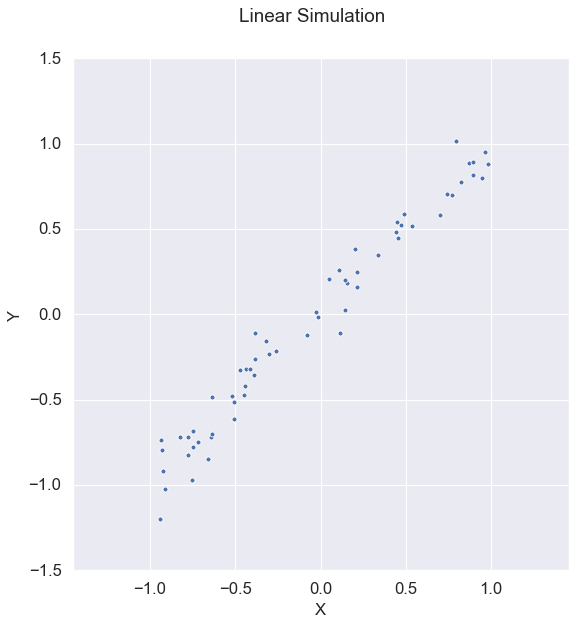

In [68]:
X, Y = sims.linear_sim(num_samp=60, num_dim=1, noise=0.1)
mgc_plot(X, Y, "Linear", only_viz=True)

**Then let us compute MGC stats for this linear data and plot the local correlation maps:**

MGC test statistic: 0.9679914410923227
P Value: 0.0
Optimal Scale: [60, 60]


<Figure size 640x480 with 0 Axes>

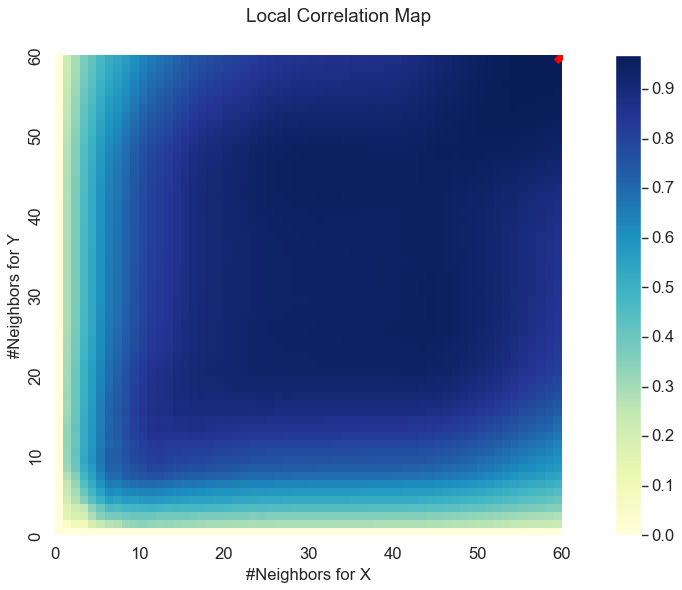

In [69]:
mgc_plot(X, Y, "Linear", only_mgc=True)

As we can see, the local correlation map plot **suggests a strongly linear relationship**. This is because intuitively, having more and more neighbors will help in our identification of the linear relationship between x and y, and as we can see in the local correlation map, **the optimal scale \[60, 60\] is the global scale marked by the red spot on the map**.

# Simulated Non-Linear Data
### Spiral Simulation
Now, we use a simulated example of 60 samples of Spiral data with added gaussian noise of 0.1.

**First let's visualize the data, which clearly shows a slightly non-linear relationship:**

<Figure size 640x480 with 0 Axes>

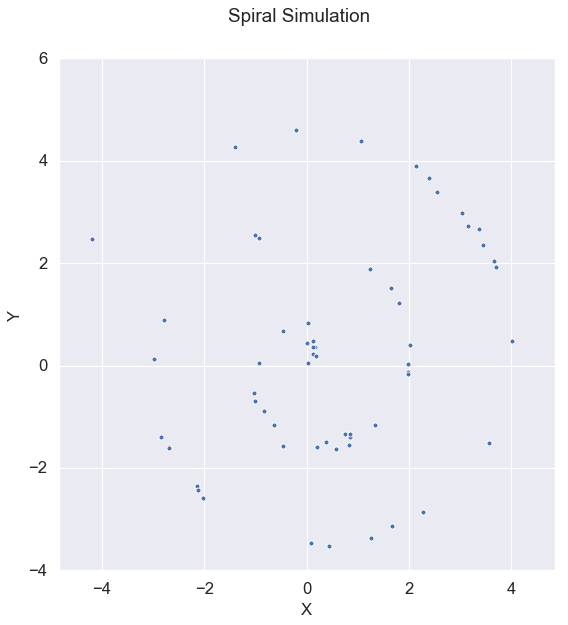

In [71]:
X, Y = sims.spiral_sim(num_samp=60, num_dim=1, noise=0.1)
mgc_plot(X, Y, "Spiral", only_viz=True)

**Then let us compute MGC stats for this non-linear data and plot the local correlation maps:**

MGC test statistic: 0.25396950503424287
P Value: 0.0
Optimal Scale: [3, 3]


<Figure size 640x480 with 0 Axes>

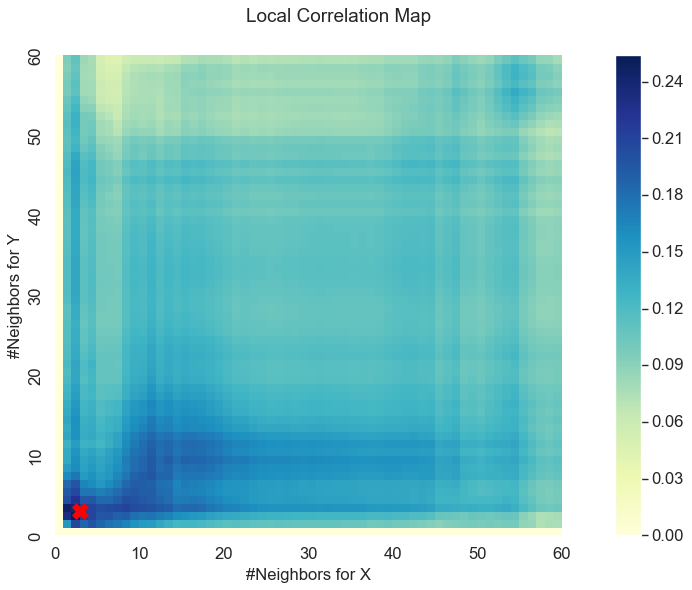

In [72]:
mgc_plot(X, Y, "Spiral", only_mgc=True)

As we can see, the local correlation map plot suggests **a strongly non-linear relationship**. This is because intuitively, having fewer neighbors will help in our identification of the non-linear relationship between x and y, and as we can see in the local correlation map, **the optimal scale [3, 3] is not the global scale, but is local, marked by the red spot on the map.**

# MGC on 20 Different Simulated Data
Now let us run MGC on 20 different simulations with `50 samples` each and `1 D` with `0.1 noise`. **The different simulations we are going to try are:** *circle_sim, cub_sim, exp_sim, joint_sim, linear_sim, log_sim, multi_indep_sim, multi_noise_sim, quad_sim, root_sim, sin_sim, spiral_sim, square_sim, step_sim, two_parab_sim, ubern_sim, w_sim*

In [76]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [73]:
# To run MGC on all 20 simulations

# Import all simulations
from mgcpy.benchmarks.simulations import (circle_sim, cub_sim, exp_sim,
                                          joint_sim, linear_sim, log_sim,
                                          multi_indep_sim, multi_noise_sim,
                                          quad_sim, root_sim, sin_sim,
                                          spiral_sim, square_sim, step_sim,
                                          two_parab_sim, ubern_sim, w_sim)

# Python generator to generate and iterate over all 20 simulations
def generate_simulations():
    NUM_SAMPLES = 50
    NUM_DIMS = 1

    def sin_sim_16(x, y, noise): return sin_sim(x, y, noise, period=16*np.pi)

    def ellipsis_sim(x, y, noise): return circle_sim(x, y, noise, radius=5)

    def square_sim_(x, y, noise): return square_sim(x, y, noise, period=-np.pi/4, indep=True)

    simulations = [linear_sim, exp_sim, cub_sim, joint_sim, step_sim,
                   quad_sim, w_sim, spiral_sim, ubern_sim, log_sim,
                   root_sim, sin_sim, sin_sim_16, square_sim, two_parab_sim,
                   circle_sim, ellipsis_sim, square_sim_, multi_noise_sim, multi_indep_sim]

    for simulation in simulations:
        simulation_name = str(simulation.__name__)
        if simulation_name == "multi_noise_sim" or simulation_name == "multi_indep_sim":
            x, y = simulation(NUM_SAMPLES, NUM_DIMS)
        else:
            x, y = simulation(NUM_SAMPLES, NUM_DIMS, noise=0.1)
        yield x, y, simulation_name

Simulation Name: Linear


<Figure size 640x480 with 0 Axes>

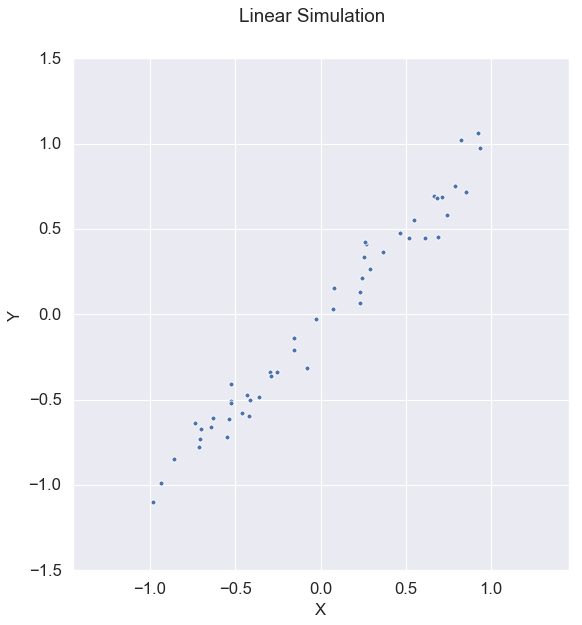

MGC test statistic: 0.9695369434637428
P Value: 0.0
Optimal Scale: [50, 50]


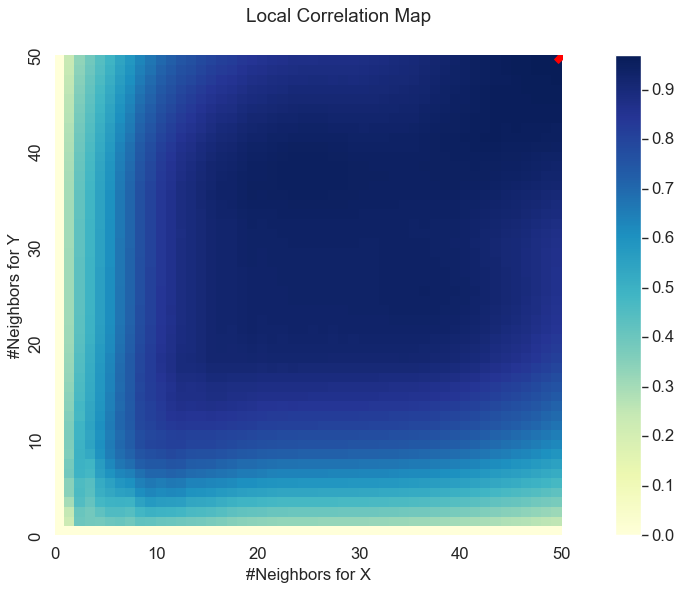

Simulation Name: Exp


<Figure size 640x480 with 0 Axes>

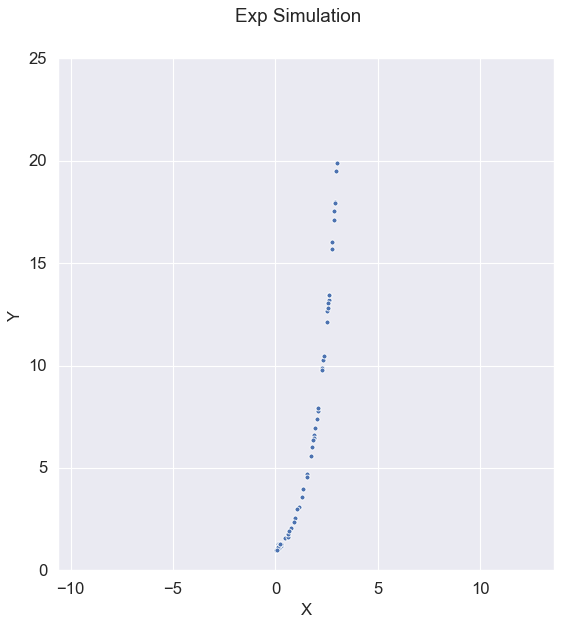

MGC test statistic: 1.0
P Value: 0.0
Optimal Scale: [15, 14]


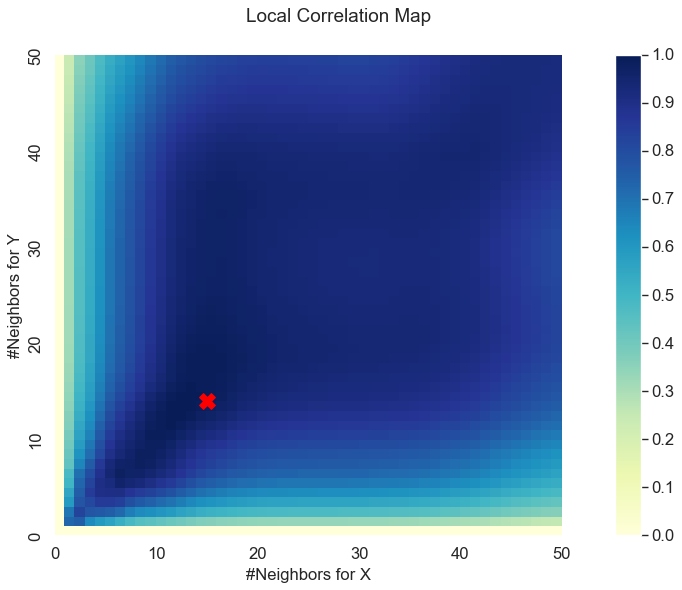

Simulation Name: Cub


<Figure size 640x480 with 0 Axes>

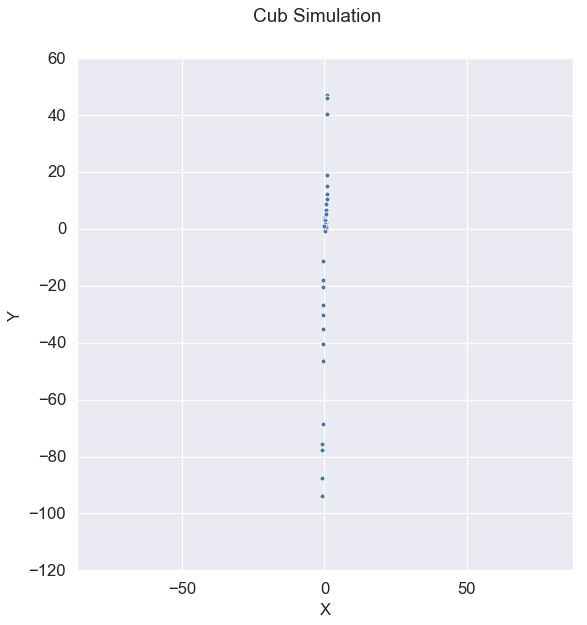

MGC test statistic: 0.8709648166017554
P Value: 0.0
Optimal Scale: [6, 6]


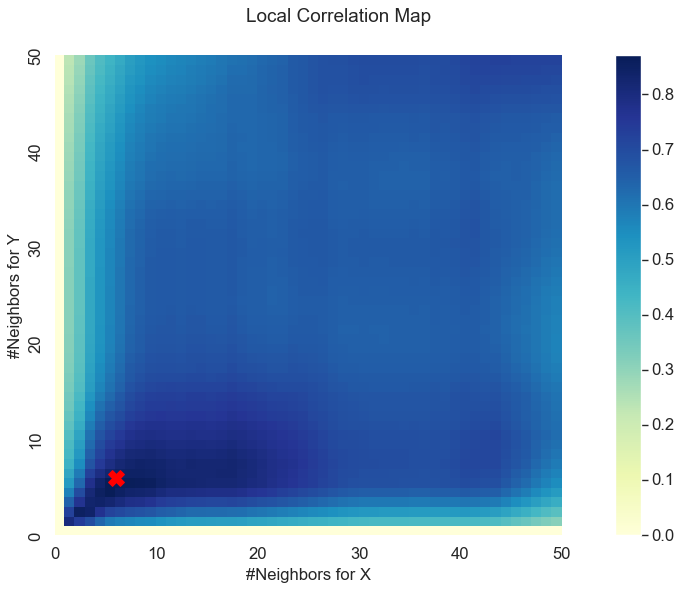

Simulation Name: Joint


<Figure size 640x480 with 0 Axes>

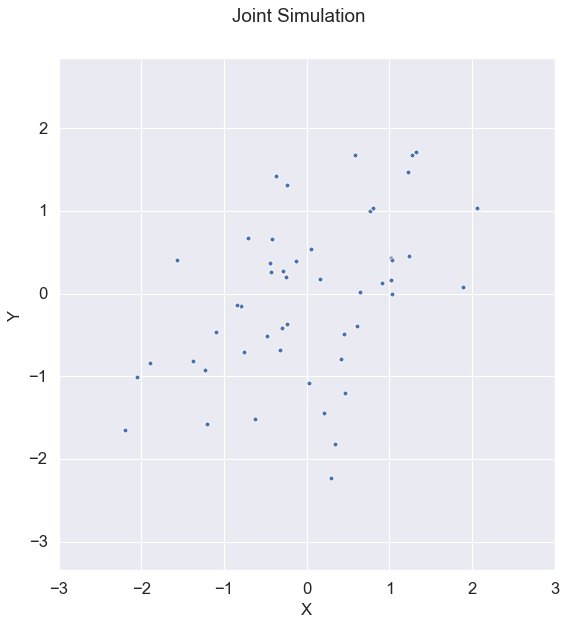

MGC test statistic: 0.17248839434049387
P Value: 0.007
Optimal Scale: [50, 50]


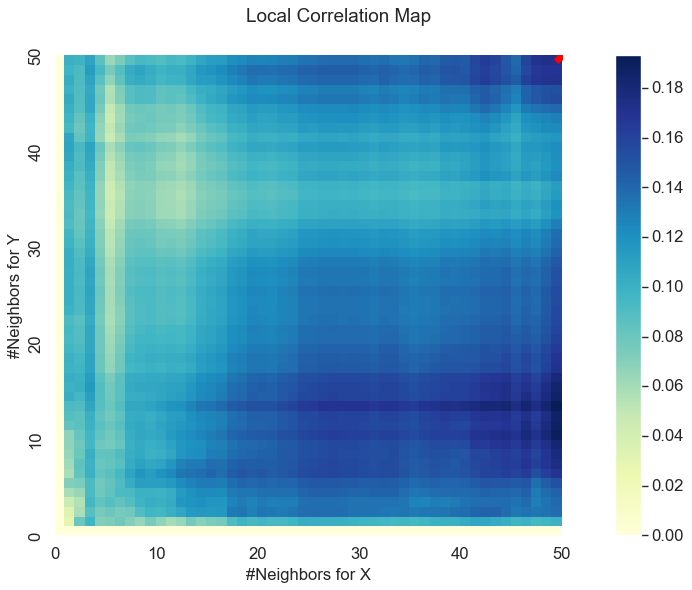

Simulation Name: Step


<Figure size 640x480 with 0 Axes>

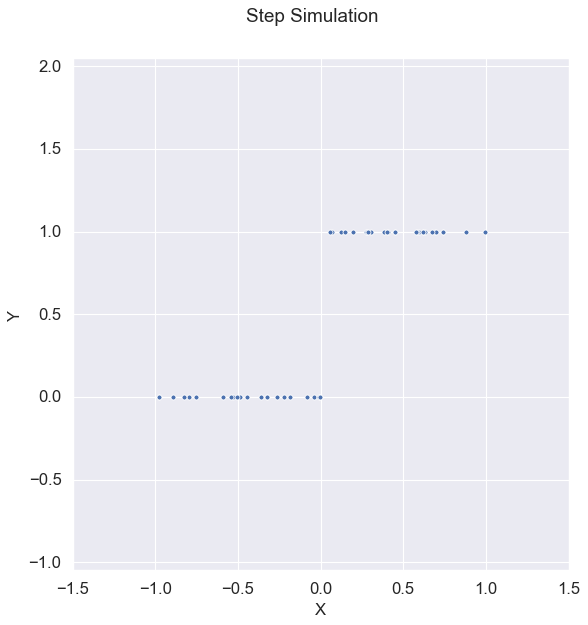

MGC test statistic: 0.7974311065692653
P Value: 0.0
Optimal Scale: [43, 2]


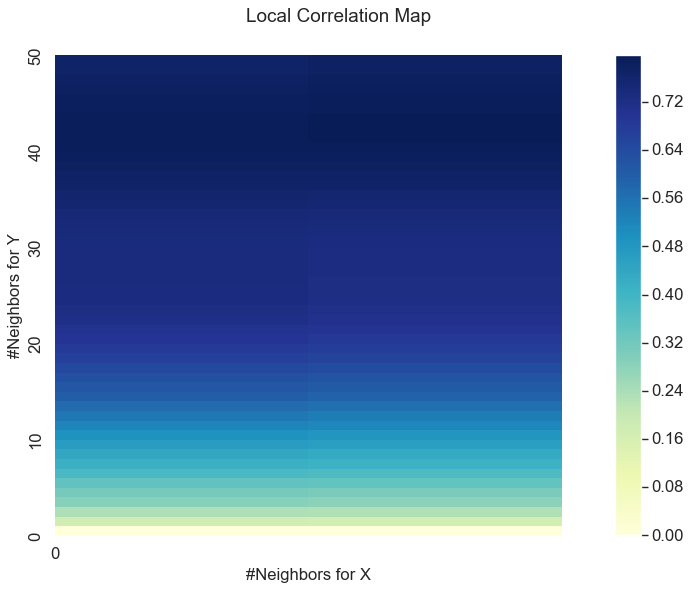

Simulation Name: Quad


<Figure size 640x480 with 0 Axes>

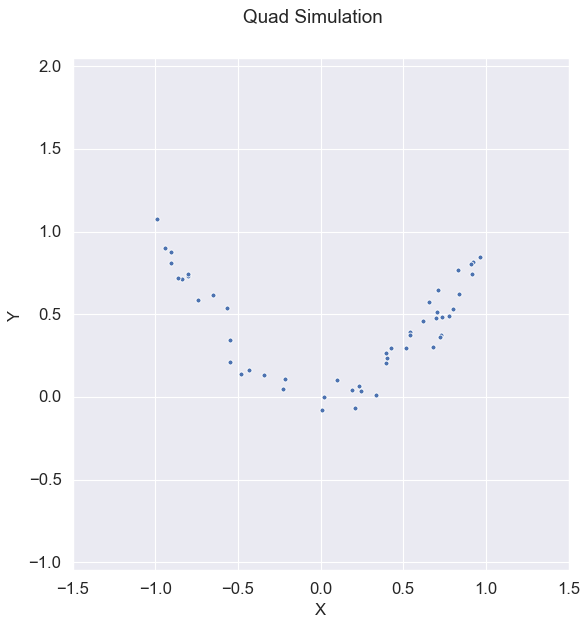

MGC test statistic: 0.47798692076876126
P Value: 0.0
Optimal Scale: [8, 22]


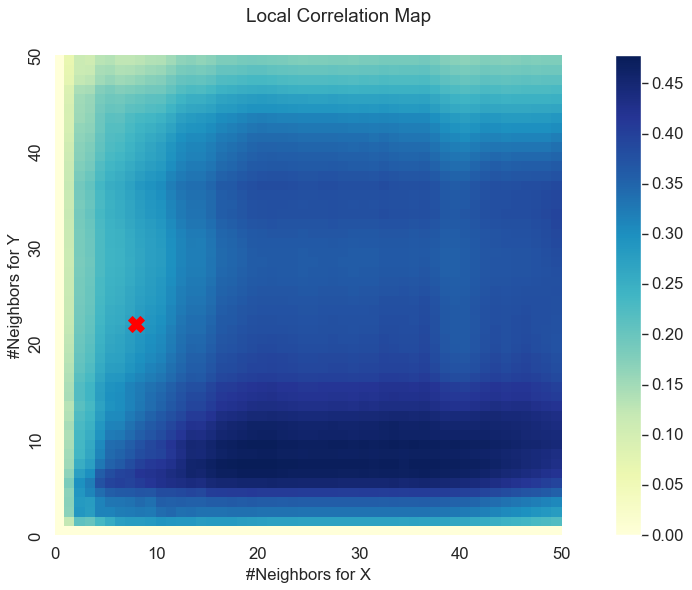

Simulation Name: W


<Figure size 640x480 with 0 Axes>

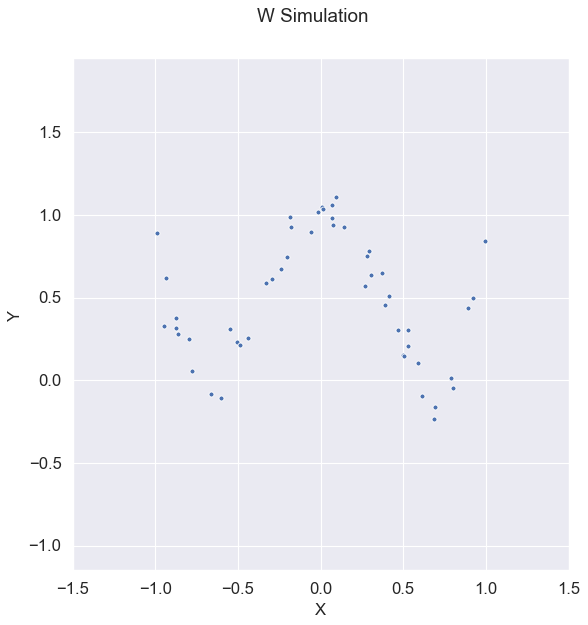

MGC test statistic: 0.37586127252719254
P Value: 0.0
Optimal Scale: [14, 50]


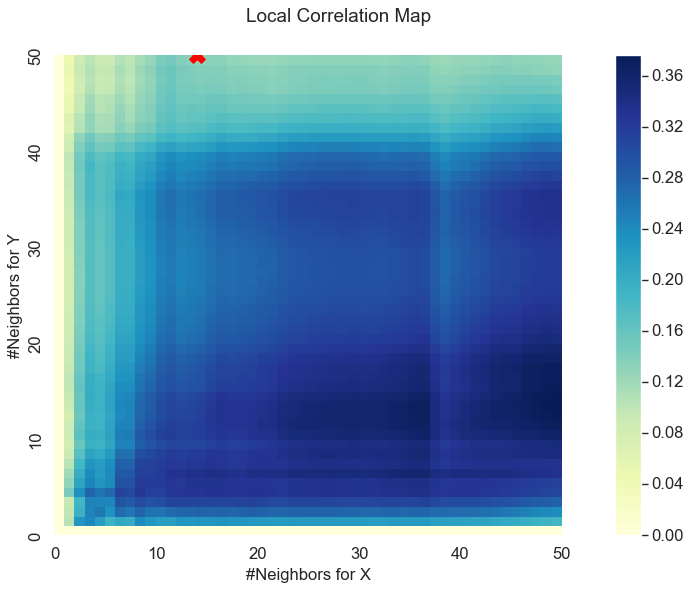

Simulation Name: Spiral


<Figure size 640x480 with 0 Axes>

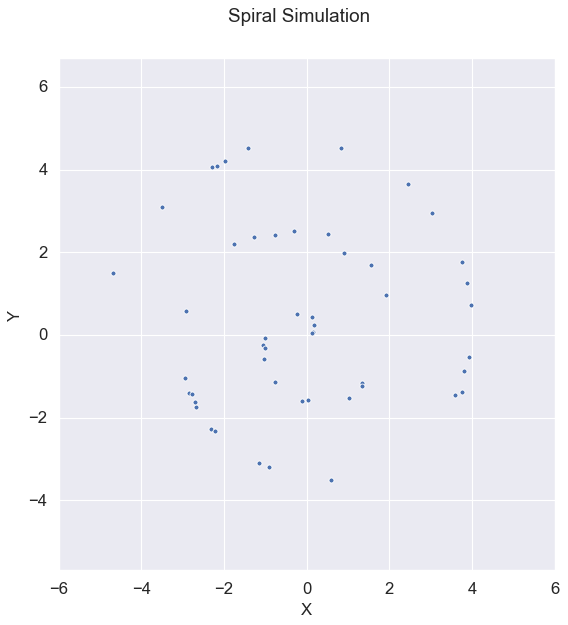

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/mgcpy-0.0.5-py3.6-macosx-10.13-x86_64.egg/mgcpy/independence_tests/abstract_class.py:154: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  "Use results such as test_statistic and optimal_scale, with caution!")


MGC test statistic: -0.01226175251236736
P Value: 0.5860000000000004
Optimal Scale: [50, 50]


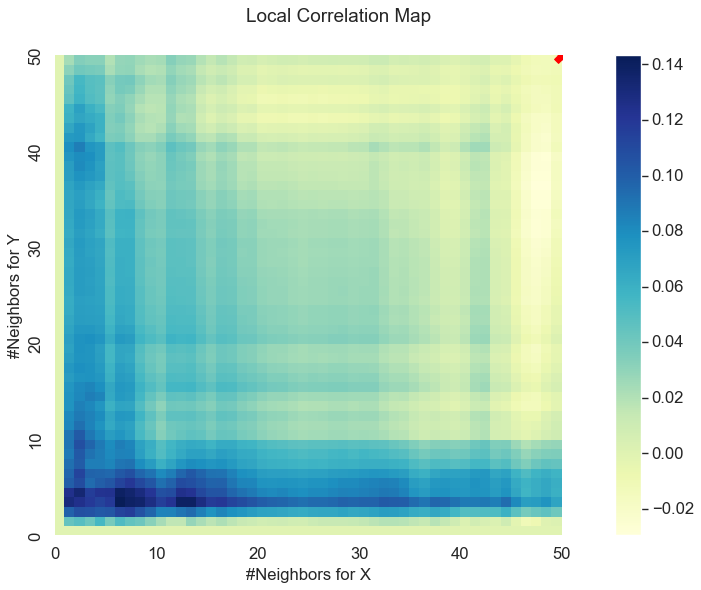

Simulation Name: Ubern


<Figure size 640x480 with 0 Axes>

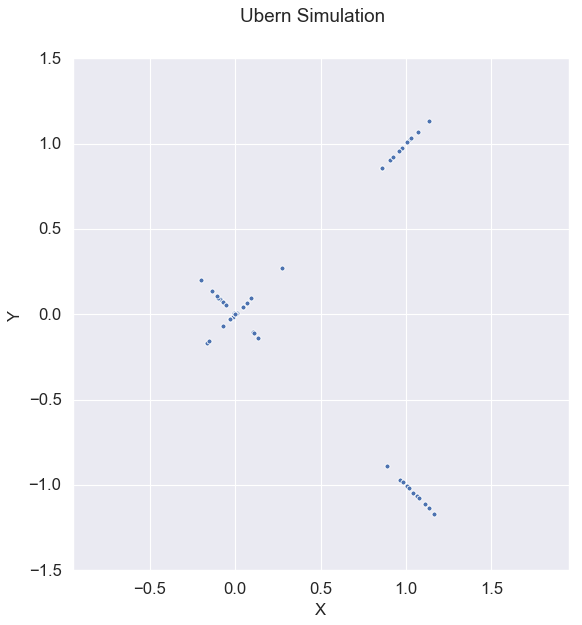

MGC test statistic: 0.8241675170096429
P Value: 0.0
Optimal Scale: [28, 39]


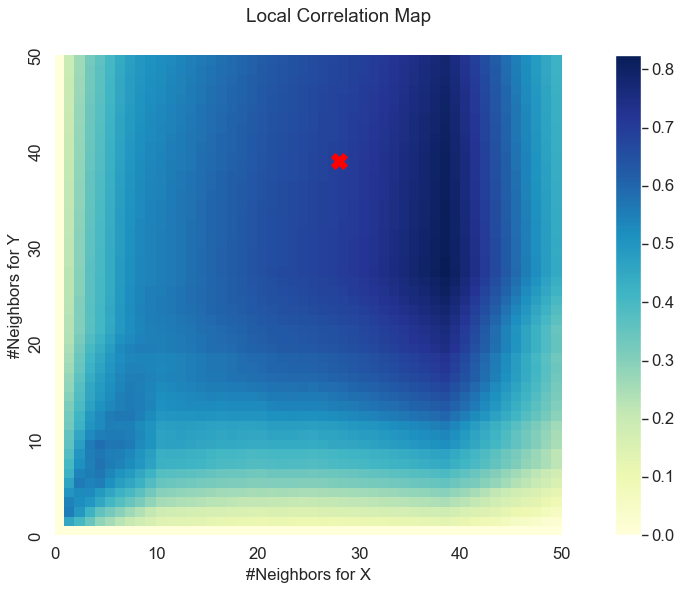

Simulation Name: Log


<Figure size 640x480 with 0 Axes>

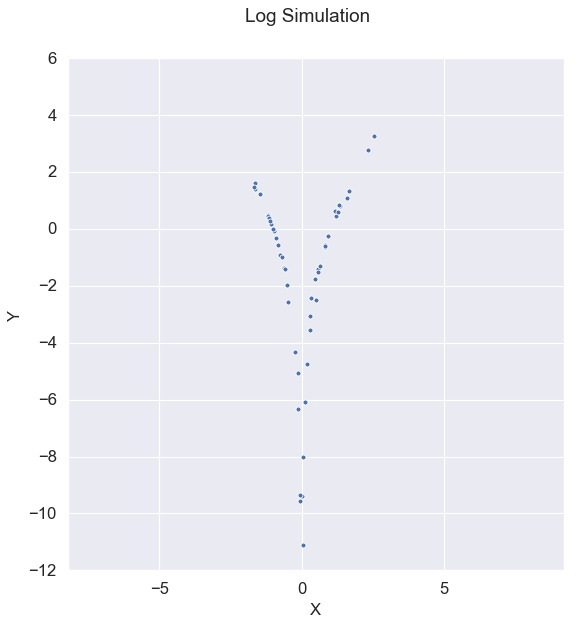

MGC test statistic: 0.6582714411396667
P Value: 0.0
Optimal Scale: [7, 11]


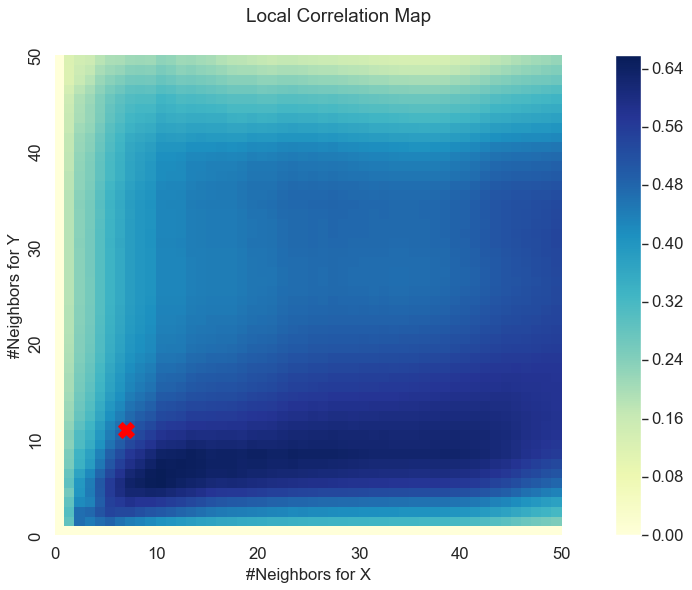

Simulation Name: Root


<Figure size 640x480 with 0 Axes>

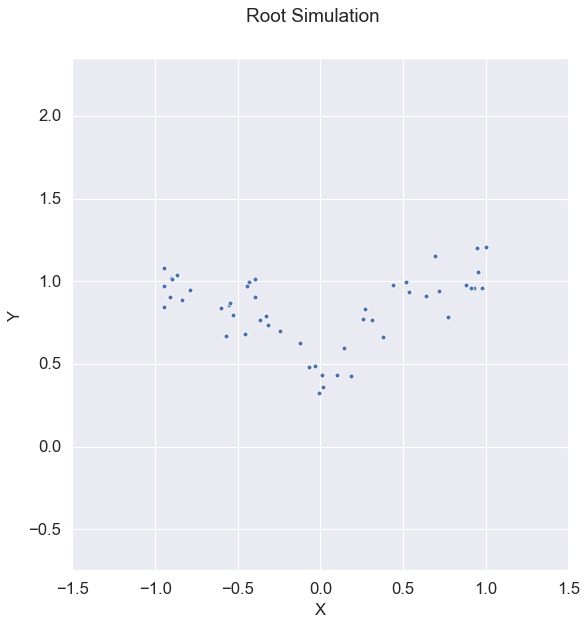

MGC test statistic: 0.38147590905074436
P Value: 0.0
Optimal Scale: [18, 50]


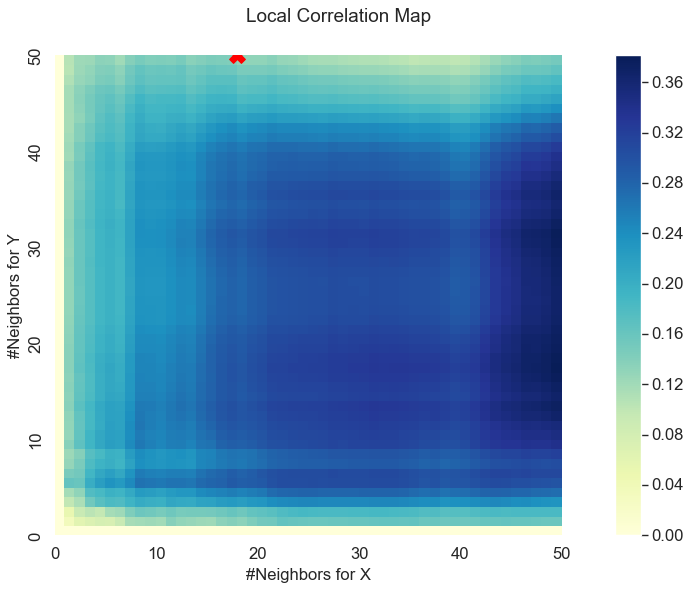

Simulation Name: Sin


<Figure size 640x480 with 0 Axes>

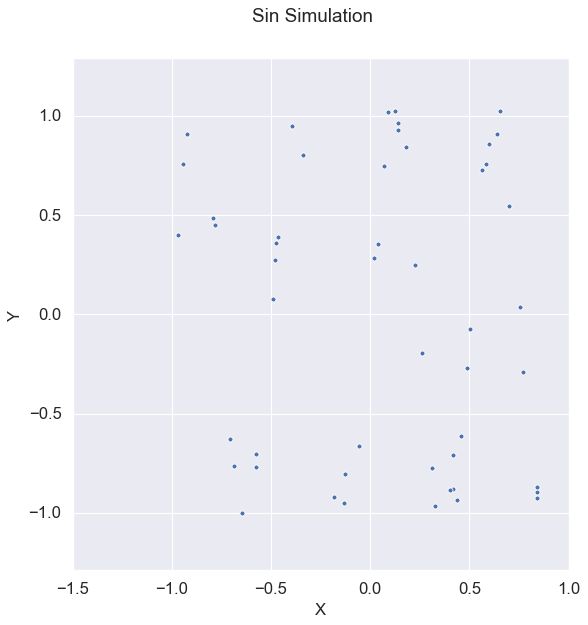

MGC test statistic: 0.2506942712517802
P Value: 0.0
Optimal Scale: [3, 32]


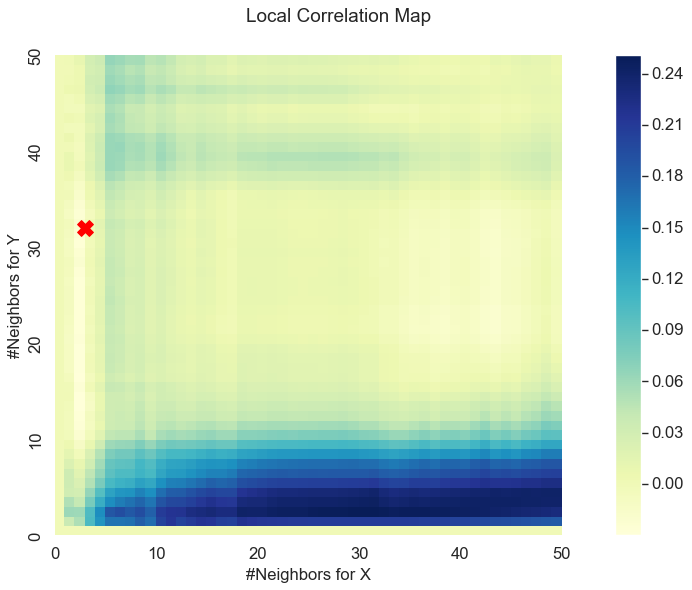

Simulation Name: Sin 16


<Figure size 640x480 with 0 Axes>

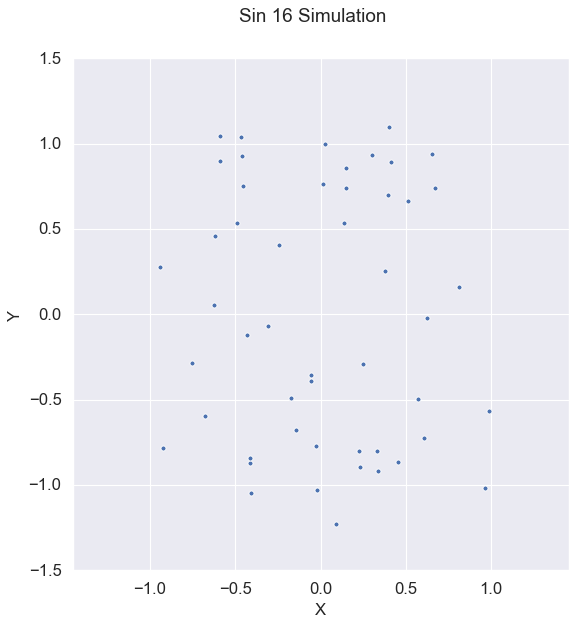

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/mgcpy-0.0.5-py3.6-macosx-10.13-x86_64.egg/mgcpy/independence_tests/abstract_class.py:154: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  "Use results such as test_statistic and optimal_scale, with caution!")


MGC test statistic: -0.02440489299547278
P Value: 0.8790000000000007
Optimal Scale: [50, 50]


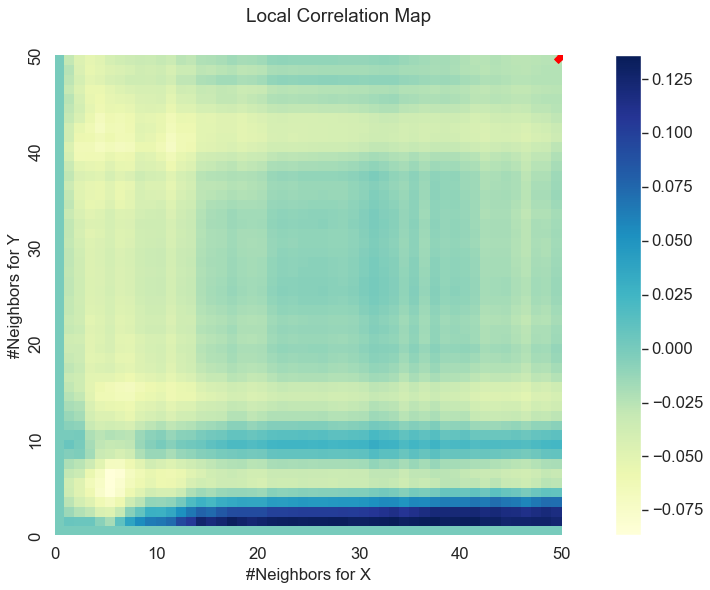

Simulation Name: Square


<Figure size 640x480 with 0 Axes>

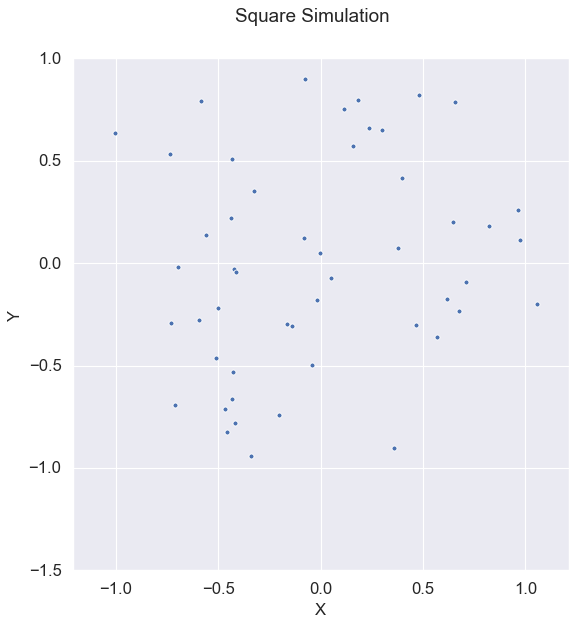

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/mgcpy-0.0.5-py3.6-macosx-10.13-x86_64.egg/mgcpy/independence_tests/abstract_class.py:154: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  "Use results such as test_statistic and optimal_scale, with caution!")


MGC test statistic: 0.04316133832457104
P Value: 0.07800000000000006
Optimal Scale: [50, 50]


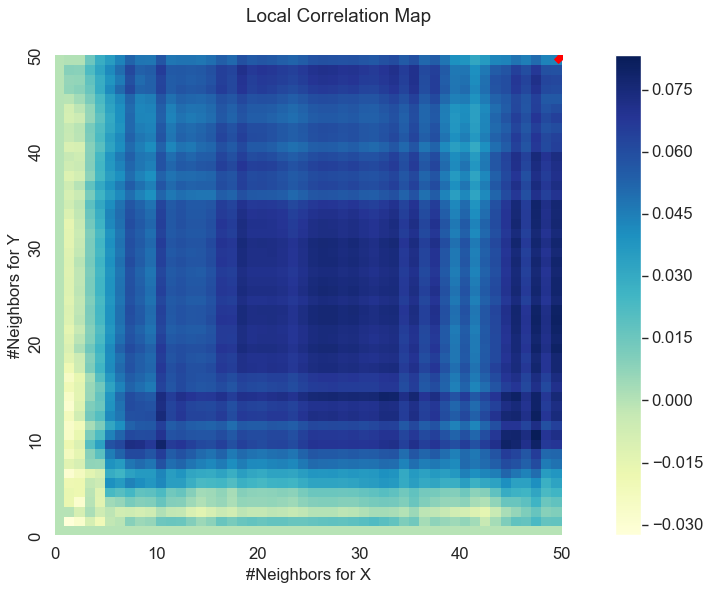

Simulation Name: Two parab


<Figure size 640x480 with 0 Axes>

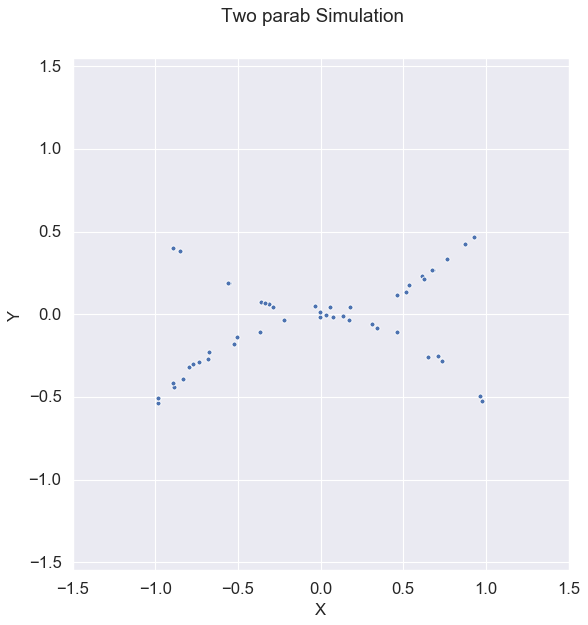

MGC test statistic: 0.444966395402635
P Value: 0.0
Optimal Scale: [8, 10]


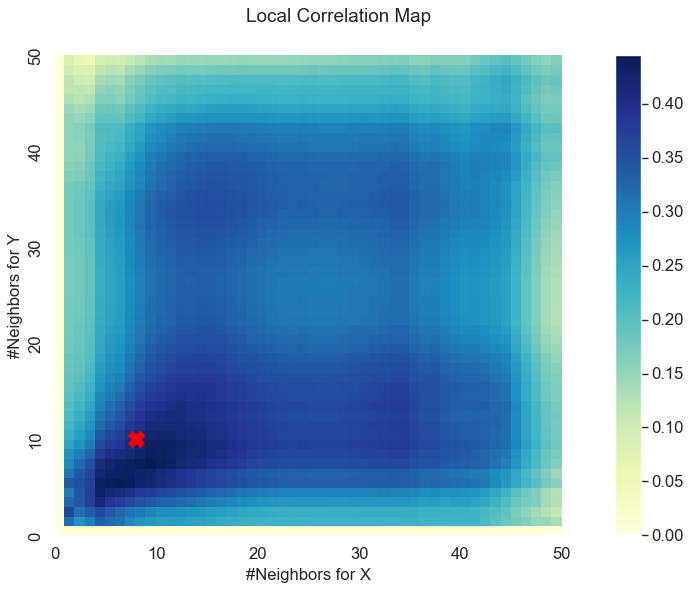

Simulation Name: Circle


<Figure size 640x480 with 0 Axes>

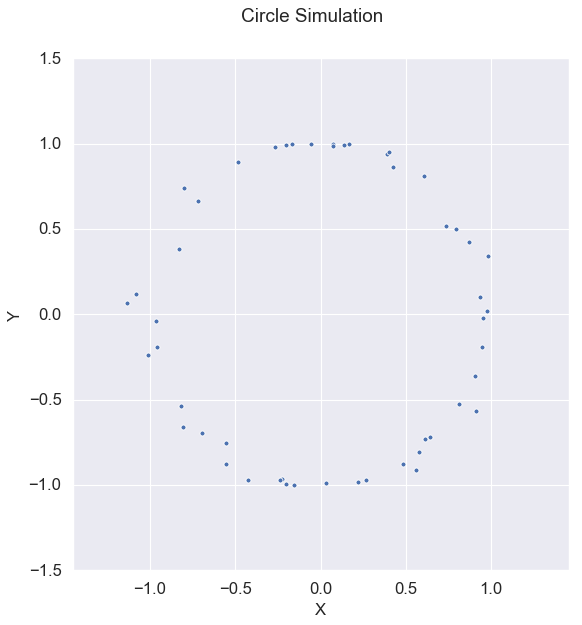

MGC test statistic: 0.24683755465097226
P Value: 0.0
Optimal Scale: [10, 8]


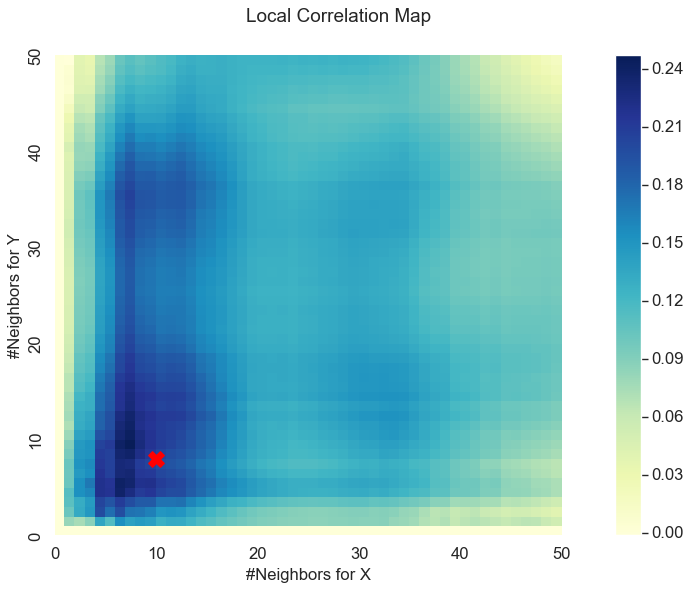

Simulation Name: Ellipsis


<Figure size 640x480 with 0 Axes>

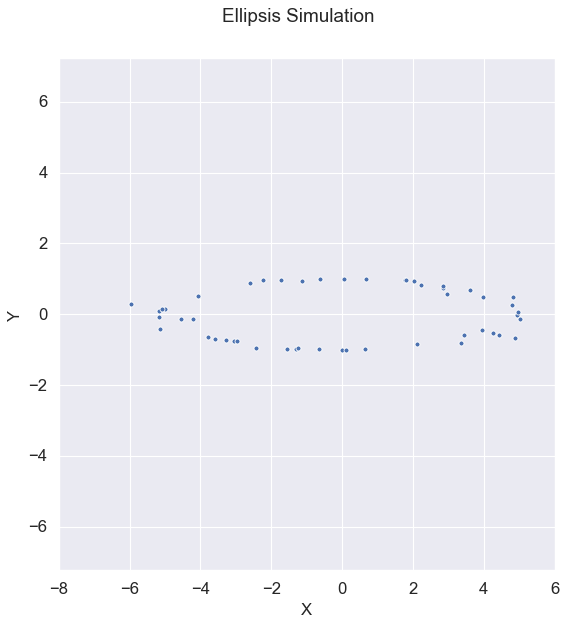

MGC test statistic: 0.28294607841899105
P Value: 0.001
Optimal Scale: [9, 8]


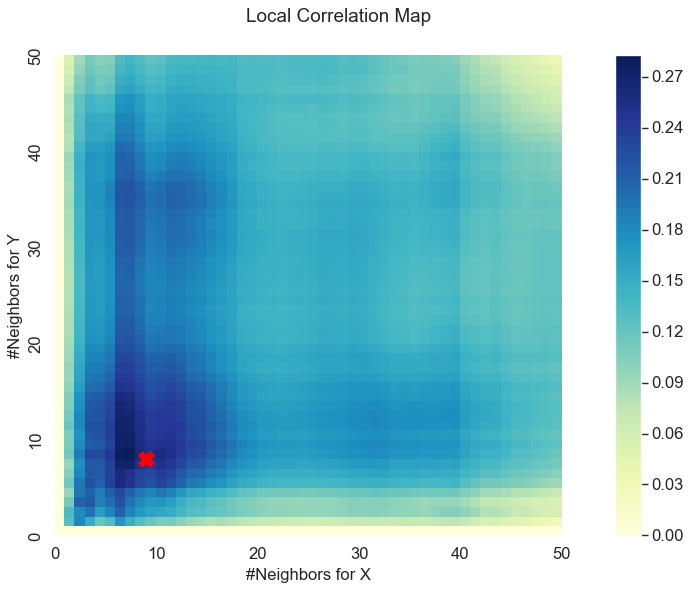

Simulation Name: Square 


<Figure size 640x480 with 0 Axes>

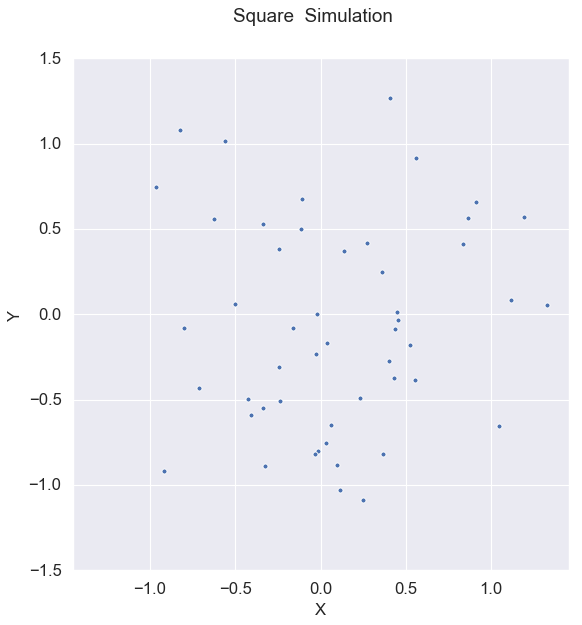

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/mgcpy-0.0.5-py3.6-macosx-10.13-x86_64.egg/mgcpy/independence_tests/abstract_class.py:154: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  "Use results such as test_statistic and optimal_scale, with caution!")


MGC test statistic: 0.009036980449526172
P Value: 0.2780000000000002
Optimal Scale: [50, 50]


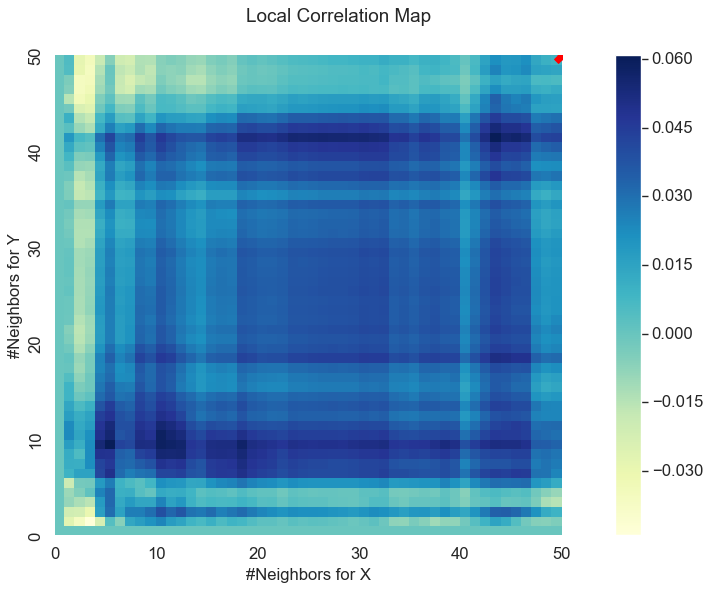

Simulation Name: Multi noise


<Figure size 640x480 with 0 Axes>

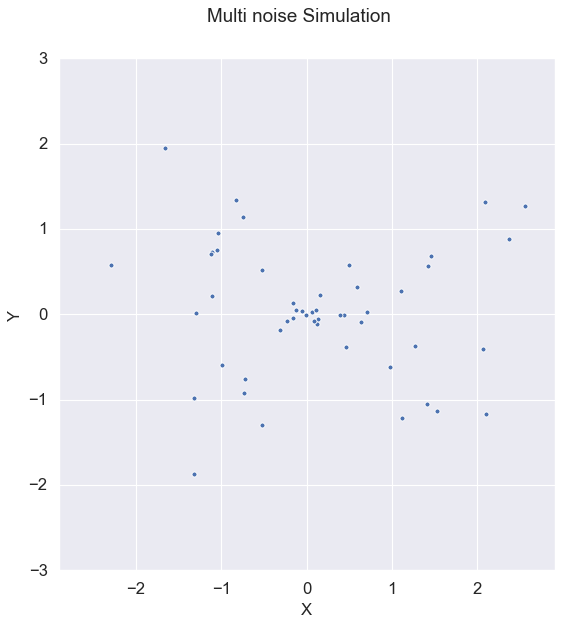

MGC test statistic: 0.19757540182901046
P Value: 0.001
Optimal Scale: [16, 16]


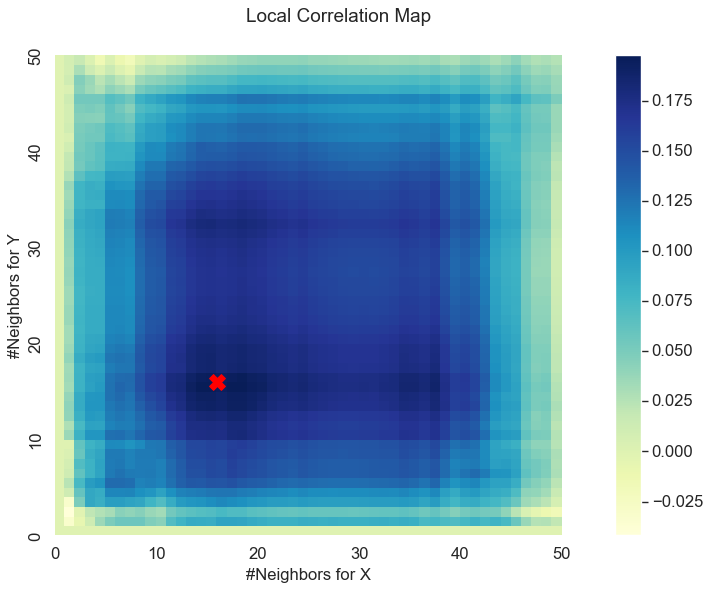

Simulation Name: Multi indep


<Figure size 640x480 with 0 Axes>

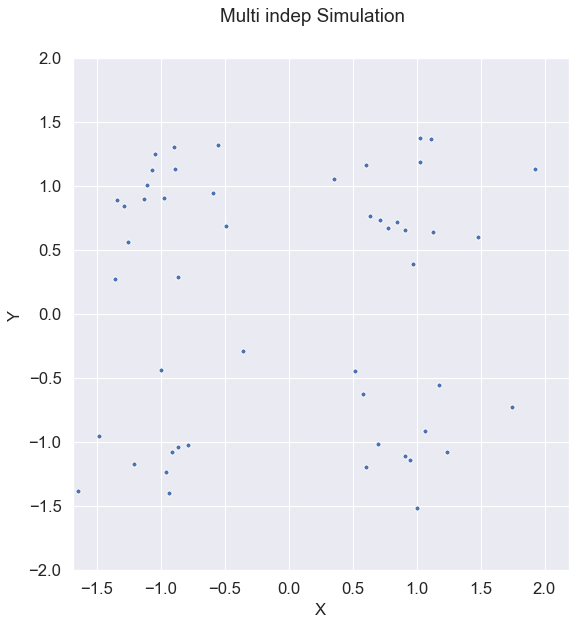

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/mgcpy-0.0.5-py3.6-macosx-10.13-x86_64.egg/mgcpy/independence_tests/abstract_class.py:154: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  "Use results such as test_statistic and optimal_scale, with caution!")


MGC test statistic: -0.02600794332621378
P Value: 0.9600000000000007
Optimal Scale: [50, 50]


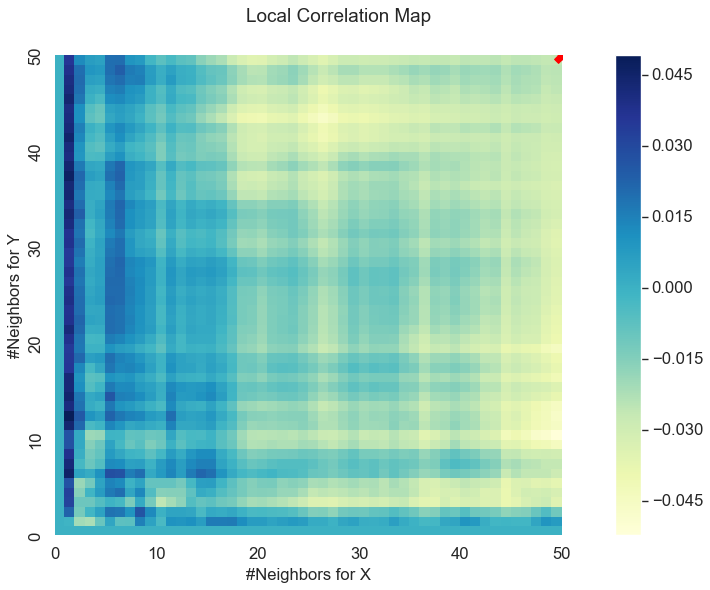

In [75]:
# Plot MGC results of all 20 simulations
for x, y, simulation_name in generate_simulations():
    simulation_name = " ".join(simulation_name.replace("_sim","").split("_")).capitalize()
    print("Simulation Name:", simulation_name)
    mgc_plot(x, y, simulation_name)